# EXPLORATION_03 카메라 스티커 앱 만들기    

### 이 노드의 루브릭
  1) 자기만의 카메라앱 기능 구현을 완수하였다. -> "원본에 스티커 사진이 정상적으로 합성되었다"    
  2) 스티커 이미지를 정확한 원본 위치에 반영하였다.    
          -> "정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다."     
  3) 카메라 스티커앱을 다양한 원본 이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.    
          -> "얼굴 각도, 이미지 밝기, 촬영 거리 등 다양한 변수에 따른 영향도를 체계적으로 분석하였다."    

### 이 노드의 작업 순서    
   * (이 노드에 한해서 각 단계를 명시하고 있기 때문에, 각 단계의 조건을 반영하여 작업하려고 한다.)
   
 1) 스티커 구하기    
 2) 얼굴 검출하기     
 3) 랜드마크 검출하기 --> dlib로 bonding box, landmark 위치 검출    
 4) 스티커 적용 위치 확인하기 --> 2, 30, 36, 48번 인덱스를 이용     
 5) 스티커를 적용하기         
     - np.where 사용     
     - 더 자연스럽게 보이도록 cv.addWeighted() 활용(추천!)          


   6) 문제점을 찾아내보기     
     - 얼굴 각도에 따라 스티커가 어떻게 변해야 할까?     
     - 멀리서 촬영하면 왜 안될까? 옆으로 누워서 촬영하면 왜 안될까?      
     - 실행 속도가 중요할까?      
     - 정확도가 많이 중요할까?            

### 1. 스티커 구하기
   * 이런 스티커를 구해왔다.

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

print("필요한 라이브러리를 모두 임포트했습니다.")

필요한 라이브러리를 모두 임포트했습니다.


이미지 경로 :  /home/ssac23/SUBMIT_MISSION_GIT/ex3_CameraSticker/Images/cat.png


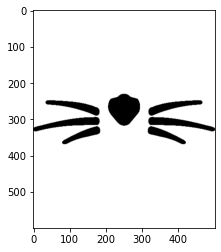

이미지 경로 :  /home/ssac23/SUBMIT_MISSION_GIT/ex3_CameraSticker/Images/정면_선명한각도.jpg


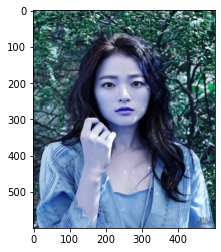

In [4]:
image_path = os.getenv('HOME') +'/SUBMIT_MISSION_GIT/ex3_CameraSticker/Images'
images = '/cat.png', '/정면_선명한각도.jpg'

for image in images :
    img_brg = cv2.imread(image_path + image)
    print('이미지 경로 : ' , image_path + image)
    img_brg = cv2.resize(img_brg, (500, 600))
    img_show = img_brg.copy()
    
    plt.imshow(img_brg)
    plt.show()

### 내 사진은 한 번 해봤기 때문에 배우 사진으로 대신하는걸로...

### 2. 얼굴 검출하여 Bounding Box 그리기

   * 실습에서 배운대로, HOG 방식을 이용한다.
   * 실습에서 활용한 "68개의 얼굴 랜드마크 모델" 을 동일하게 적용한다.

In [5]:
import dlib

hog_detector = dlib.get_frontal_face_detector()
print("hog detector 선언 완료!")

hog detector 선언 완료!


In [6]:
#바운딩 박스로 얼굴 검출해보기
img_rgb = cv2.cvtColor(img_brg, cv2.COLOR_BGR2RGB)

#1이 컬러 채널이라는 것 잊지 말자구~
dlib_rects = hog_detector(img_rgb, 1)

print("얼굴 검출 완료! 좌표는 : ", dlib_rects)

얼굴 검출 완료! 좌표는 :  rectangles[[(167, 167) (322, 322)]]


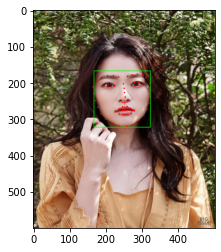

In [20]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    r = dlib_rect.right()
    t = dlib_rect.top()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 3. 얼굴에서 특징을 찾아라! 랜드마크 ~건설~

In [8]:
model_path = os.getenv('HOME') + '/SUBMIT_MISSION_GIT/ex3_CameraSticker/Models'

landmark_detector = dlib.shape_predictor(model_path + '/shape_predictor_68_face_landmarks.dat')
print("모델을 무사히 데려왔습니다!")

모델을 무사히 데려왔습니다!


In [9]:
# 건설한 랜드마크들을 적용해 줄 배열과 함께 출력...

list_landmarks =[]

for dlib_rect in dlib_rects:
    points = landmark_detector(img_rgb, dlib_rect)
    
    #points.parts() 메소드로 불러온 68개의 점들을 선언한 배열에 넣고 
    #내친김에 크기도 확인
    list_points = list(map(lambda p:(p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
    #정말 68개인가
    print("정말 68개인가? : " , len(list_landmarks[0]))

정말 68개인가? :  68


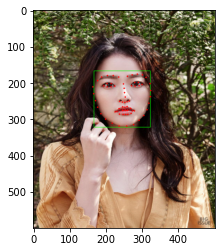

In [10]:
# 랜드마크를 사진에 적용

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        
        #원을 그림(이미지, 센터, 지름, 색깔, shift 등...)
        #차별화를 위해 파란색으로 그려보겠다 ㅎㅎ
        cv2.circle(img_show, point, 2, (0,0,255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 4. 이제 대망의 고양이 수염 스티커 붙이기!

* 노드에서 준 힌트대로, 68개 랜드마크 중 특정 번호들을 이용해봅시다.
* 힌트 포인트 : 2, 30, 36, 48번!

![68개 랜드마크 이미지](./Images/68.png)

* 사진이 너무 무섭게 생겼는데...?
* 어쨌든 2, 30, 36, 48은 각각 얼굴 왼쪽 끝점, 코의 중심점, 코의 오른쪽 끝점, 오른 눈의 아래 중간점이다.

* 전략: __고양이 사진의 중심을 코의 31번 점에 붙일 것이다__ (힌트는 전혀.. 아랑곳하지 않는다..)

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print("코의 중심보다 아주 약간! 내려간 그곳의 좌표는 :")
    print(landmark[31])

코의 중심보다 아주 약간! 내려간 그곳의 좌표는 :
(238, 251)


In [21]:
# 고양이 수염 사진의 중심점을 저 31번 좌표와 딱 맞춰 보겠다는 그런.. 늑김...
# 이미지의 x, y (탑-레프트 기준)
# 이미지의 너비/높이 구하여 적용

x=landmark[31][0]
y=landmark[31][1]

#이미지의 사이즈를 검출된 바인딩 박스의 각각 1/3 크기로 줄여준다.
#수염이 너무 크면 부자연스러우니까..
w=dlib_rect.width()//3
h=dlib_rect.height()//3

print("비교해보자")
print("코의 중심점 위치 : " , landmark[31])
print("이미지의 크기 : (%d, %d)" %(w, h))


비교해보자
코의 중심점 위치 :  (238, 251)
이미지의 크기 : (52, 52)


### 4-1. 마 함 스근하이 붙여보입시더

In [22]:
# 스티커 이미지를 내부 패스에서 불러온 다음, 리사이징하여 붙여본다.
# 리사이징하는 이유 => 얼굴을 검출해서 그린 dlib_rect크기에 맞게 스티커를 재조정해야
# 스티커가 지나치게 크거나 작아서 곤란하지 않다.
sticker_path = os.getenv('HOME') +'/SUBMIT_MISSION_GIT/ex3_CameraSticker/Images/cat.png'
sticker_img = cv2.imread(sticker_path)
sticker_img = cv2.resize(sticker_img, (w,h))
print(sticker_img.shape)

(52, 52, 3)


In [ ]:
# 이제 31번 랜드마크(코의 중심 약간 아래)에 있는 이미지를
# 탑-레프트 점을 중심으로 약간 옮겨줄 수 있도록
# x좌표와 y좌표를 재조정한다.

In [23]:
#우리가 (refined_x, refined_y)로 구하는 위치 -> 이동한 스티커의 탑-레프트 끝점
refined_x = x-w//2
refined_y = y-h

print('(x, y) : (%d, %d)'%(refined_x, refined_y))

(x, y) : (212, 199)


* 다행히 다 양수이기 때문에, 고양이 수염 사진이 원본사진(인물사진) 밖으로 나가지는 않았음을 알 수 있다.

### 4-2. 이제 진짜진짜 붙여봅시다

In [27]:
# sticker_area = [스티커 탑레프트y:스티커의 세로길이만큼] , [스티커탑레프트x:재정립위치X+스티커 가로길이만큼]
sticker_area = img_show[refined_y:sticker_img.shape[0], refined_x:refined_x+sticker_img.shape[1]]

#이미지를 정해진 크기로 보여줄 것임
#단, sticker_img가 0인 부분은 sticker_area를 적용하고, 아닌 부분은 sticker_img를 적용한다.
img_show[refined_y:sticker_img.shape[0], refined_x:refined_x+sticker_img.shape[1]] =\
np.where(sticker_img==0, sticker_area, sticker_img).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

ValueError: operands could not be broadcast together with shapes (52,52,3) (0,52,3) (52,52,3) 

   * 위와 같은 오류가 났을 때, '배열의 크기'에 문제가 있는 것으로 보여진다.   
     따라서 이를 수정하기 위해 각 이미지의 꼭지점들의 위치를 한 번 출력해 보았다.

In [29]:
#이미지 영역의 세로 영역을 관장하는 부분
print("탑-레프트 y점의 위치 : ", refined_y)
print("\n스티커 이미지의 세로 길이 : ", sticker_img.shape[0])

#이미지 영역의 가로 영역을 관장하는 부분
print("\n탑-레프트 x점의 위치 :" ,refined_x)
print("\n스티커 이미지의 가로 길이 : ", sticker_img.shape[1])


탑-레프트 y점의 위치 :  199

스티커 이미지의 세로 길이 :  52

탑-레프트 x점의 위치 : 212

스티커 이미지의 가로 길이 :  52


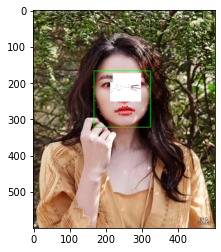

In [33]:
# sticker_area = [스티커 탑레프트y:스티커의 세로길이만큼] , [스티커탑레프트x:재정립위치X+스티커 가로길이만큼]
sticker_area = img_show[refined_y:refined_y+sticker_img.shape[0], refined_x:refined_x+sticker_img.shape[1]]

#이미지를 정해진 크기로 보여줄 것임
#단, sticker_img가 0인 부분은 sticker_area를 적용하고, 아닌 부분은 sticker_img를 적용한다.
img_show[refined_y:refined_y+sticker_img.shape[0], refined_x:refined_x+sticker_img.shape[1]] =\
np.where(sticker_img==0, sticker_area, sticker_img).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

   * 배열 크기가 수정은 되어 붙었는데, 문제가 생겼다.     
   1) 일단 위치가 잘 맞지 않고,     
   2) 사진이 투명처리된 게 아닌것처럼 나온다! 
   
   __무엇이 문제일까?__

### 수정 1. 일단, 랜드마크 점을 바꿔본다. 

 - 아무래도 사진의 중심점이 31번에 가서 잘 붙은 것 같긴 한데, 31번은 최선이 아니었던 그런 늑김이다.
 - 그렇다면 34번에 가져다 붙여보면 어떨까?
 - 그리고, 사진 크기도 아주 조금 키워준다. 1/3화 하니까 너무 작아졌다..

비교해보자
코의 중심점 위치 :  (258, 252)
이미지의 크기 : (78, 78)
(78, 78, 3)
(x, y) : (219, 174)


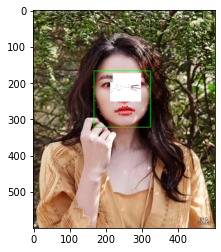

In [32]:
# 고양이 수염 사진의 중심점을 저 31번 좌표와 딱 맞춰 보겠다는 그런.. 늑김...
# 이미지의 x, y (탑-레프트 기준)
# 이미지의 너비/높이 구하여 적용

x=landmark[34][0]
y=landmark[34][1]

#이미지의 사이즈를 검출된 바인딩 박스의 각각 1/3 크기로 줄여준다.
#수염이 너무 크면 부자연스러우니까..
w=dlib_rect.width()//2
h=dlib_rect.height()//2

print("비교해보자")
print("코의 중심점 위치 : " , landmark[34])
print("이미지의 크기 : (%d, %d)" %(w, h))

# 스티커 이미지를 내부 패스에서 불러온 다음, 리사이징하여 붙여본다.
# 리사이징하는 이유 => 얼굴을 검출해서 그린 dlib_rect크기에 맞게 스티커를 재조정해야
# 스티커가 지나치게 크거나 작아서 곤란하지 않다.
sticker_path = os.getenv('HOME') +'/SUBMIT_MISSION_GIT/ex3_CameraSticker/Images/cat.png'
sticker_img = cv2.imread(sticker_path)
sticker_img = cv2.resize(sticker_img, (w,h))
print(sticker_img.shape)

#우리가 (refined_x, refined_y)로 구하는 위치 -> 이동한 스티커의 탑-레프트 끝점
refined_x = x-w//2
refined_y = y-h

print('(x, y) : (%d, %d)'%(refined_x, refined_y))

# sticker_area = [스티커 탑레프트y:스티커의 세로길이만큼] , [스티커탑레프트x:재정립위치X+스티커 가로길이만큼]
sticker_area = img_show[refined_y:refined_y+sticker_img.shape[0], refined_x:refined_x+sticker_img.shape[1]]

#이미지를 정해진 크기로 보여줄 것임
#단, sticker_img가 0인 부분은 sticker_area를 적용하고, 아닌 부분은 sticker_img를 적용한다.
img_show[refined_y:refined_y+sticker_img.shape[0], refined_x:refined_x+sticker_img.shape[1]] =\
np.where(sticker_img==0, sticker_area, sticker_img).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

#### 1번 수정의 결과 :
   - 크기는 1/2 한 지금이 낫고, 위치는 31 랜드마크 기준이 좀 더 나은 것 같다. 

## 2번 수정
   - 경로를 여러 차례 옮겨본 결과,'스티커 이미지의 바텀-센터 기준에 맞춰 랜드마크를 찍어줄 때 가장 자연스러웠다.
   - 원래 하고 싶었던 건 스티커 이미지의 중점(대각선의 교차점)을 구해서 코의 중심점에 맞추는거였긴 하지만..
   - 따라서, 58번 랜드마크에 맞춰 이미지를 재배치한다.

비교해보자
코의 중심점 위치 :  (247, 287)
이미지의 크기 : (78, 78)
(78, 78, 3)
(x, y) : (208, 209)


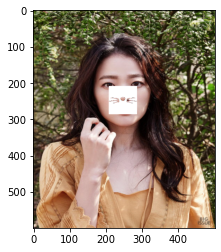

In [47]:
image_path = os.getenv('HOME') +'/SUBMIT_MISSION_GIT/ex3_CameraSticker/Images/정면_선명한각도.jpg'

img_brg = cv2.imread(image_path)
img_brg = cv2.resize(img_brg, (500, 600))
img_show = img_brg.copy()
    
plt.imshow(img_brg)

# 고양이 수염 사진의 중심점을 저 31번 좌표와 딱 맞춰 보겠다는 그런.. 늑김...
# 이미지의 x, y (탑-레프트 기준)
# 이미지의 너비/높이 구하여 적용

x=landmark[58][0]
y=landmark[58][1]

#이미지의 사이즈를 검출된 바인딩 박스의 각각 1/3 크기로 줄여준다.
#수염이 너무 크면 부자연스러우니까..
w=dlib_rect.width()//2
h=dlib_rect.height()//2

print("비교해보자")
print("코의 중심점 위치 : " , landmark[58])
print("이미지의 크기 : (%d, %d)" %(w, h))

# 스티커 이미지를 내부 패스에서 불러온 다음, 리사이징하여 붙여본다.
# 리사이징하는 이유 => 얼굴을 검출해서 그린 dlib_rect크기에 맞게 스티커를 재조정해야
# 스티커가 지나치게 크거나 작아서 곤란하지 않다.
sticker_path = os.getenv('HOME') +'/SUBMIT_MISSION_GIT/ex3_CameraSticker/Images/cat.png'
sticker_img = cv2.imread(sticker_path)
sticker_img = cv2.resize(sticker_img, (w,h))
print(sticker_img.shape)

#우리가 (refined_x, refined_y)로 구하는 위치 -> 이동한 스티커의 탑-레프트 끝점
refined_x = x-w//2
refined_y = y-h

print('(x, y) : (%d, %d)'%(refined_x, refined_y))

# sticker_area = [스티커 탑레프트y:스티커의 세로길이만큼] , [스티커탑레프트x:재정립위치X+스티커 가로길이만큼]
sticker_area = img_show[refined_y:refined_y+sticker_img.shape[0], refined_x:refined_x+sticker_img.shape[1]]

#이미지를 정해진 크기로 보여줄 것임
#단, sticker_img가 0인 부분은 sticker_area를 적용하고, 아닌 부분은 sticker_img를 적용한다.
img_show[refined_y:refined_y+sticker_img.shape[0], refined_x:refined_x+sticker_img.shape[1]] =\
np.where(sticker_img==0, sticker_area, sticker_img).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 3번 수정
   - 음, 스티커 이미지가 잘못된걸까?      
   - 이미지 자체도 흐릿하고, 투명 처리되어야 할 부분이 진한 배경으로 남아있어 np.where의 인자들을 검색하여 함수를 수정해주었다.
   
   > np.where(sticker_img==1, sticker_area, stiker_img) 부분을 수정했다.     
   > 위의 의미는 sticker_img가 0인 부분은 sticker_area를 적용하고, 아닌 부분은 sticker_img를 적용해! 라는 것이었는데    
   > 시험삼아 정 반대의 결과를 줬더니 오히려 이미지가 선명해졌다.

### 혹시 몰라 슬랙을 찾아보던 중에....

* 비슷한 상황을 겪으신 분들이 조언해주신 걸 거슬러 올라가 보니, 단순히       
  np.where의 첫 인자가 0, 1값에 한정되는 것이 아니라 0~255까지의 값인 것을 알게되었다.
* np.where(sticker_img==255, sticker_area, sticker_img)로 바꿨더니..

비교해보자
코의 중심점 위치 :  (247, 287)
이미지의 크기 : (78, 78)
(78, 78, 3)
(x, y) : (208, 209)


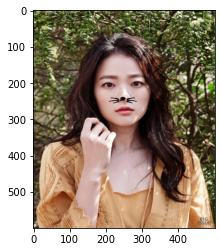

In [50]:
image_path = os.getenv('HOME') +'/SUBMIT_MISSION_GIT/ex3_CameraSticker/Images/정면_선명한각도.jpg'

img_brg = cv2.imread(image_path)
img_brg = cv2.resize(img_brg, (500, 600))
img_show = img_brg.copy()
    
plt.imshow(img_brg)

# 고양이 수염 사진의 중심점을 저 31번 좌표와 딱 맞춰 보겠다는 그런.. 늑김...
# 이미지의 x, y (탑-레프트 기준)
# 이미지의 너비/높이 구하여 적용

x=landmark[58][0]
y=landmark[58][1]

#이미지의 사이즈를 검출된 바인딩 박스의 각각 1/3 크기로 줄여준다.
#수염이 너무 크면 부자연스러우니까..
w=dlib_rect.width()//2
h=dlib_rect.height()//2

print("비교해보자")
print("코의 중심점 위치 : " , landmark[58])
print("이미지의 크기 : (%d, %d)" %(w, h))

# 스티커 이미지를 내부 패스에서 불러온 다음, 리사이징하여 붙여본다.
# 리사이징하는 이유 => 얼굴을 검출해서 그린 dlib_rect크기에 맞게 스티커를 재조정해야
# 스티커가 지나치게 크거나 작아서 곤란하지 않다.
sticker_path = os.getenv('HOME') +'/SUBMIT_MISSION_GIT/ex3_CameraSticker/Images/cat.png'
sticker_img = cv2.imread(sticker_path)
sticker_img = cv2.resize(sticker_img, (w,h))
print(sticker_img.shape)

#우리가 (refined_x, refined_y)로 구하는 위치 -> 이동한 스티커의 탑-레프트 끝점
refined_x = x-w//2
refined_y = y-h

print('(x, y) : (%d, %d)'%(refined_x, refined_y))

# sticker_area = [스티커 탑레프트y:스티커의 세로길이만큼] , [스티커탑레프트x:재정립위치X+스티커 가로길이만큼]
sticker_area = img_show[refined_y:refined_y+sticker_img.shape[0], refined_x:refined_x+sticker_img.shape[1]]

#이미지를 정해진 크기로 보여줄 것임
#단, sticker_img가 0인 부분은 sticker_area를 적용하고, 아닌 부분은 sticker_img를 적용한다.
img_show[refined_y:refined_y+sticker_img.shape[0], refined_x:refined_x+sticker_img.shape[1]] =\
np.where(sticker_img==255, sticker_area, sticker_img).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 고양이 수염 붙이기 완성!

#### 하지만 모델의 얼굴 각도가 약간 틀어져 있어서인지 완벽하게 들어맞아 보이지는 않는다.       
### 그럼, 이러한 문제점은 어떻게 수정해볼 수 있을까?

1) 각도
   - cv(opencv)의 회전함수를 활용하여, 고양이 수염을 약간 회전시켜 붙여볼 수 있을까?

얼굴 검출 완료! 좌표는 :  rectangles[[(43, 43) (266, 266)]]
비교해보자
코의 중심점 위치 :  (158, 233)
이미지의 크기 : (112, 112)
(112, 112, 3)
(x, y) : (102, 121)


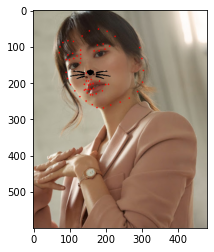

In [66]:
image_path = os.getenv('HOME') +'/SUBMIT_MISSION_GIT/ex3_CameraSticker/Images/lean.jpg'

img_brg = cv2.imread(image_path)
img_brg = cv2.resize(img_brg, (480, 600))
img_show = img_brg.copy()
    
hog_detector = dlib.get_frontal_face_detector()

#바운딩 박스로 얼굴 검출해보기
img_rgb = cv2.cvtColor(img_brg, cv2.COLOR_BGR2RGB)

#1이 컬러 채널이라는 것 잊지 말자구~
dlib_rects = hog_detector(img_rgb, 1)

print("얼굴 검출 완료! 좌표는 : ", dlib_rects)


list_landmarks =[]

for dlib_rect in dlib_rects:
    points = landmark_detector(img_rgb, dlib_rect)
    
    #points.parts() 메소드로 불러온 68개의 점들을 선언한 배열에 넣고 
    #내친김에 크기도 확인
    list_points = list(map(lambda p:(p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        
        #원을 그림(이미지, 센터, 지름, 색깔, shift 등...)
        #차별화를 위해 파란색으로 그려보겠다 ㅎㅎ
        cv2.circle(img_show, point, 2, (0,0,255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
    
# 고양이 수염 사진의 중심점을 저 31번 좌표와 딱 맞춰 보겠다는 그런.. 늑김...
# 이미지의 x, y (탑-레프트 기준)
# 이미지의 너비/높이 구하여 적용

x=landmark[58][0]
y=landmark[58][1]

#이미지의 사이즈를 검출된 바인딩 박스의 각각 1/3 크기로 줄여준다.
#수염이 너무 크면 부자연스러우니까..
w=dlib_rect.width()//2
h=dlib_rect.height()//2

print("비교해보자")
print("코의 중심점 위치 : " , landmark[58])
print("이미지의 크기 : (%d, %d)" %(w, h))

# 스티커 이미지를 내부 패스에서 불러온 다음, 리사이징하여 붙여본다.
# 리사이징하는 이유 => 얼굴을 검출해서 그린 dlib_rect크기에 맞게 스티커를 재조정해야
# 스티커가 지나치게 크거나 작아서 곤란하지 않다.
sticker_path = os.getenv('HOME') +'/SUBMIT_MISSION_GIT/ex3_CameraSticker/Images/cat.png'
sticker_img = cv2.imread(sticker_path)
sticker_img = cv2.resize(sticker_img, (w,h))
print(sticker_img.shape)

#우리가 (refined_x, refined_y)로 구하는 위치 -> 이동한 스티커의 탑-레프트 끝점
refined_x = x-w//2
refined_y = y-h

print('(x, y) : (%d, %d)'%(refined_x, refined_y))

# sticker_area = [스티커 탑레프트y:스티커의 세로길이만큼] , [스티커탑레프트x:재정립위치X+스티커 가로길이만큼]
sticker_area = img_show[refined_y:refined_y+sticker_img.shape[0], refined_x:refined_x+sticker_img.shape[1]]

#이미지를 정해진 크기로 보여줄 것임
#단, sticker_img가 0인 부분은 sticker_area를 적용하고, 아닌 부분은 sticker_img를 적용한다.
img_show[refined_y:refined_y+sticker_img.shape[0], refined_x:refined_x+sticker_img.shape[1]] =\
np.where(sticker_img==255, sticker_area, sticker_img).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

   * 약간 위쪽으로 밀려나있긴 하지만, 전반적으로 얼굴 위치를 잘 찾은 것을 확인할 수 있다.(심지어 약간 어두운 이미지인데도!)     
   * 여기에서, 고양이 수염을 약간 회전시켜 보자.
   * 먼저 openCV에서 이미지를 회전하는 함수인 cv2.getRotationMatrix2D 를 이용하고,    
   * 스티커 이미지의 중심점을 축으로,         
   * 양쪽 입가의 끝점(49번과 55번)으로 
   
   ![얼굴 점 다시 한번](./Images/68.png)

   * 49번, 55번을 선으로 잇고 (55번의 x,49번의 y값)을 가진 제 3의 점을 기준으로 회전각을 구하여 이를 적용하면 어떨까?

In [60]:
(dot_x, dot_y) = landmark[49][0], landmark[55][1]

print(dot_x, dot_y)

141 222


##### 유용할 것 같은...!

[이 블로그 글을 참조했습니다.](https://blog.naver.com/PostView.nhn?blogId=vps32&logNo=221762189533)
![이런 식의 행렬 변환이죠](./Images/이런방식.png)

#### 계속 진행중이지만 일단 평가를 위해 제출합니다.